# Practical 4

by 23AIML056 - Kavya

## Task 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint\

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector, ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

### Data Import

In [2]:
df_og1 = pd.read_csv("datasets/creditcard.csv")
df_og1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_og1.shape

(284807, 31)

Our data is very large with it containing, 284000 rows and 31 columns

### Basic Info

In [4]:
df_og1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Visualisation

V1 to V28 are encrypted features so we cant analyse that with visualisation, so we will focus on visualising our target feature `Class`.

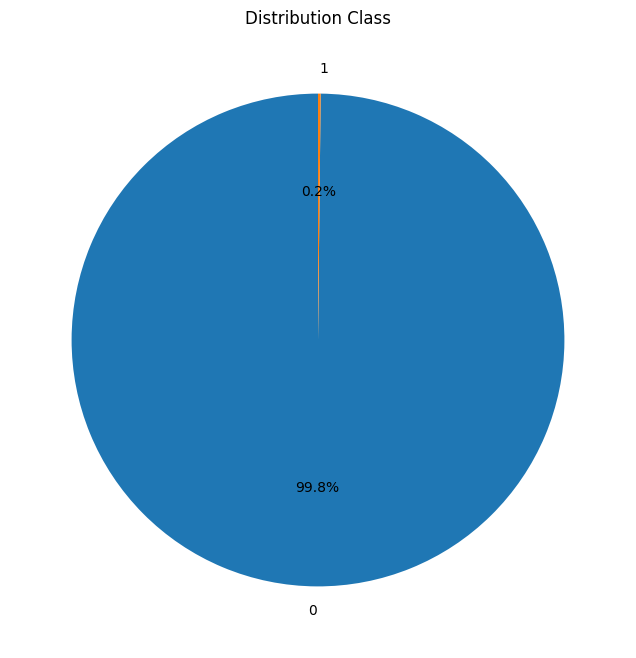

In [5]:
values = df_og1['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.title("Distribution Class")
plt.pie(values, autopct="%1.1f%%", startangle=90, labels=values.index)
plt.show()

- 0 is not fraud
- 1 is fraud

as we can see, our data is very heavily imbalanced so we will have to stratify when splitting

### Feature selection

We will also drop Time columns because it isnt very useful

In [6]:
df1 = df_og1.drop("Time", axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [8]:
X = df1.drop("Class", axis = 1)
y = df1["Class"]

### Pipeline Preparation

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            StandardScaler(),
            make_column_selector(dtype_include=["number", "float64", "int64"]),
        ),
    ]
)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (227845, 29)
y_train shape: (227845,)
X_test shape: (56962, 29)
y_test shape: (56962,)


### Model Training

In [11]:
rfc_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor),
        ("Model", RandomForestClassifier(random_state=42)),
    ]
)

adac_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor),
        ("Model", AdaBoostClassifier()),
    ]
)

gradientc_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor),
        ("Model", GradientBoostingClassifier()),
    ]
)

xgbc_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor),
        ("Model", XGBClassifier()),
    ]
)

In [12]:
classification_pipelines = {
    "RandomForest": rfc_pipeline,
    "AdaBoost": adac_pipeline,
    "GradientBoosting": gradientc_pipeline,
    "XGBoost": xgbc_pipeline,
}

results = {}

for name, pipeline in classification_pipelines.items():
    print(f"\n===== Training {name} =====")

    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results[name] = {
        "train_accuracy": train_acc,
        "test_accuracy": test_acc,
    }

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))


===== Training RandomForest =====
Train Accuracy: 1.0000
Test Accuracy:  0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


===== Training AdaBoost =====
Train Accuracy: 0.9991
Test Accuracy:  0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.76      0.74        98

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962


===== Training GradientBoosting =====
Train Accuracy: 0.9985
Test Accuracy:  0.9983

Classification Report:
              precision    reca

We can see that Random Forest Classifier gives the best results.

### Hyperparameter Tuning

In [13]:
param_dist = {
    "Model__n_estimators": randint(150, 350),
    "Model__max_depth": [None, 10, 20, 30],
    "Model__min_samples_split": randint(2, 10),
    "Model__min_samples_leaf": randint(1, 5),
    "Model__max_features": ["sqrt"],
}

random_search_classification = RandomizedSearchCV(
    rfc_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # 👈 SAFE
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

random_search_classification.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'Model__max_depth': [None, 10, ...], 'Model__max_features': ['sqrt'], 'Model__min_samples_leaf': <scipy.stats....0015FA549B7A0>, 'Model__min_samples_split': <scipy.stats....0015FA549A3C0>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` f

In [14]:
best_rfc_pipeline = random_search_classification.best_estimator_
best_rfc_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Preprocessing', ...), ('Model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse

In [15]:
print("Best parameters:")
print(random_search_classification.best_params_)

# Evaluate
y_test_pred = best_rfc_pipeline.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Best parameters:
{'Model__max_depth': None, 'Model__max_features': 'sqrt', 'Model__min_samples_leaf': 1, 'Model__min_samples_split': 5, 'Model__n_estimators': 207}

Test Accuracy: 0.9996137776061234

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Task 2

In [16]:
df_og2 = pd.read_csv("datasets/used_cars.csv")
df_og2.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [17]:
df_og2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [18]:
df_og2.shape

(4009, 12)

In [19]:
numerical_cols = df_og2.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_og2.select_dtypes(include=["object"]).columns
print(f"numerical cols: {numerical_cols}")
print(f"categorical cols: {categorical_cols}")

numerical cols: Index(['model_year'], dtype='object')
categorical cols: Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price'],
      dtype='object')


In [20]:
# Clean and convert numeric columns stored as object

df_og2["milage"] = (
    df_og2["milage"]
    .str.replace(",", "", regex=True)
    .str.extract(r"(\d+)")
    .astype(float)
)

df_og2["engine"] = df_og2["engine"].str.extract(r"([\d.]+)").astype(float)

df_og2["price"] = df_og2["price"].str.replace("[$,]", "", regex=True).astype(float)

In [21]:
X = df_og2.drop("price", axis=1)
y = df_og2["price"]

In [22]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor_reg = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = ["model_year", "milage", "engine"]

categorical_features = [
    "brand",
    "model",
    "fuel_type",
    "transmission",
    "ext_col",
    "int_col",
    "accident",
    "clean_title",
]

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor_reg = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(3207, 11) (802, 11)


In [32]:
rf_reg_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor_reg),
        ("Model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)),
    ]
)

ada_reg_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor_reg),
        ("Model", AdaBoostRegressor(n_estimators=200, random_state=42)),
    ]
)

xgb_reg_pipeline = Pipeline(
    steps=[
        ("Preprocessing", preprocessor_reg),
        (
            "Model",
            XGBRegressor(
                n_estimators=300,
                learning_rate=0.1,
                max_depth=6,
                objective="reg:squarederror",
                n_jobs=-1,
                random_state=42,
            ),
        ),
    ]
)

In [33]:
regression_pipelines = {
    "RandomForest": rf_reg_pipeline,
    "AdaBoost": ada_reg_pipeline,
    "XGBoost": xgb_reg_pipeline,
}

regression_results = {}

for name, pipeline in regression_pipelines.items():
    print(f"\n===== Training {name} Regressor =====")

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    regression_results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
    }

    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")


===== Training RandomForest Regressor =====
MAE : 16987.63
RMSE: 133150.32
R²  : 0.1326

===== Training AdaBoost Regressor =====
MAE : 47975.50
RMSE: 137836.30
R²  : 0.0705

===== Training XGBoost Regressor =====
MAE : 17150.72
RMSE: 133844.23
R²  : 0.1235


In [34]:
regression_results_df = pd.DataFrame(regression_results).T
regression_results_df

,MAE,RMSE,R2
RandomForest,16987.627157,133150.321939,0.132613
AdaBoost,47975.502970,137836.300141,0.070487
XGBoost,17150.718928,133844.231864,0.123549


Random Forest gives us the best R2 Score and RMSE possible